<a href="https://colab.research.google.com/github/svobodn1y/PP_Matrix/blob/main/MMSampled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def matrix_multiply_sampled(A, B, num_samples):
    n, d = A.shape
    d, m = B.shape

    col_norms = np.sum(A**2, axis=0)
    total_norm = np.sum(col_norms)
    probabilities = col_norms / total_norm

    C = np.zeros((n, m))
    for _ in range(num_samples):
        i = np.random.choice(d, p=probabilities)
        scale = A[:, i].reshape(-1, 1) @ B[i, :].reshape(1, -1)
        C += scale / probabilities[i]

    return C / num_samples



In [ ]:
# def compute_sampling_probabilities(A, B):
#     """
#     Compute sampling probabilities based on the norms of columns (or rows) of matrices A and B.
#     The probability p_k for each element is proportional to |A_k| * |B_k|.

#     Parameters:
#     A (numpy.ndarray): Matrix A with shape (n, d).
#     B (numpy.ndarray): Matrix B with shape (d, m).

#     Returns:
#     numpy.ndarray: An array of probabilities for each column (or row) index.
#     """

#     col_norms_A = np.linalg.norm(A, axis=0)  # Norms of columns of A
#     row_norms_B = np.linalg.norm(B, axis=1)  # Norms of rows of B

#     # Element-wise multiplication of norms
#     product_norms = col_norms_A * row_norms_B

#     # Compute probabilities by normalizing the product of norms
#     total_norm = np.sum(product_norms)
#     probabilities = product_norms / total_norm

#     return probabilities

# def matrix_multiply_sampled(A, B, num_samples):
#     """
#     Perform sampling-based matrix multiplication using importance sampling.

#     Parameters:
#     A (numpy.ndarray): Matrix A with shape (n, d).
#     B (numpy.ndarray): Matrix B with shape (d, m).
#     num_samples (int): Number of samples to draw for approximation.

#     Returns:
#     numpy.ndarray: Approximate product of A and B.
#     """
#     n, d = A.shape
#     d, m = B.shape

#     # Compute sampling probabilities
#     probabilities = compute_sampling_probabilities(A, B)

#     # Initialize the result matrix
#     C = np.zeros((n, m))

#     # Perform sampling-based multiplication
#     for _ in range(num_samples):
#         # Sample an index according to the computed probabilities
#         k = np.random.choice(d, p=probabilities)

#         # Scale the contribution of each sampled column by its probability
#         contribution = (A[:, k].reshape(-1, 1) @ B[k, :].reshape(1, -1)) / probabilities[k]

#         # Add the scaled contribution to the result matrix
#         C += contribution

#     # Average the contributions by dividing by the number of samples
#     C /= num_samples
#     return C

In [ ]:
n = 10
A = np.random.rand(n, n) * 10
B = np.random.rand(n, n) * 10

matrix_multiply_sampled(A, B, 100) - A @ B

array([[ 11.50853698, -12.851974  ,   3.36516217,   4.47449911,
         -2.27484344,   4.20772822,   0.29623867,  12.56953729,
         -5.84443968,  -0.28112471],
       [ 11.5149365 , -15.82108199,  -1.71297761,   0.18916781,
         -8.73472388,   5.51232415,   1.21834782,   9.94611131,
        -12.65530361,   2.24204664],
       [ 25.07571356,  -9.38360516,  10.11193836,   8.52384911,
         -4.70325956,  17.28041953,  13.29918047,  21.76960862,
        -13.70479808,  12.18545747],
       [ 17.16579513,   1.04589743,  17.11745291,  12.50182367,
          4.50457663,   8.50442136,   8.4366289 ,  13.15892342,
         -4.34943347,   8.87141042],
       [ 10.35583434,  -4.92383709,   3.9677662 ,   2.99205717,
         -5.62669657,   8.14675115,   8.03074143,   5.73188557,
        -13.01973319,   6.16917478],
       [  9.27658344, -12.43532674,   3.78979072,   4.50723318,
         -0.98092361,   1.43850517,  -2.22169545,  10.7377585 ,
         -4.82065828,  -2.45279996],
       [ 1

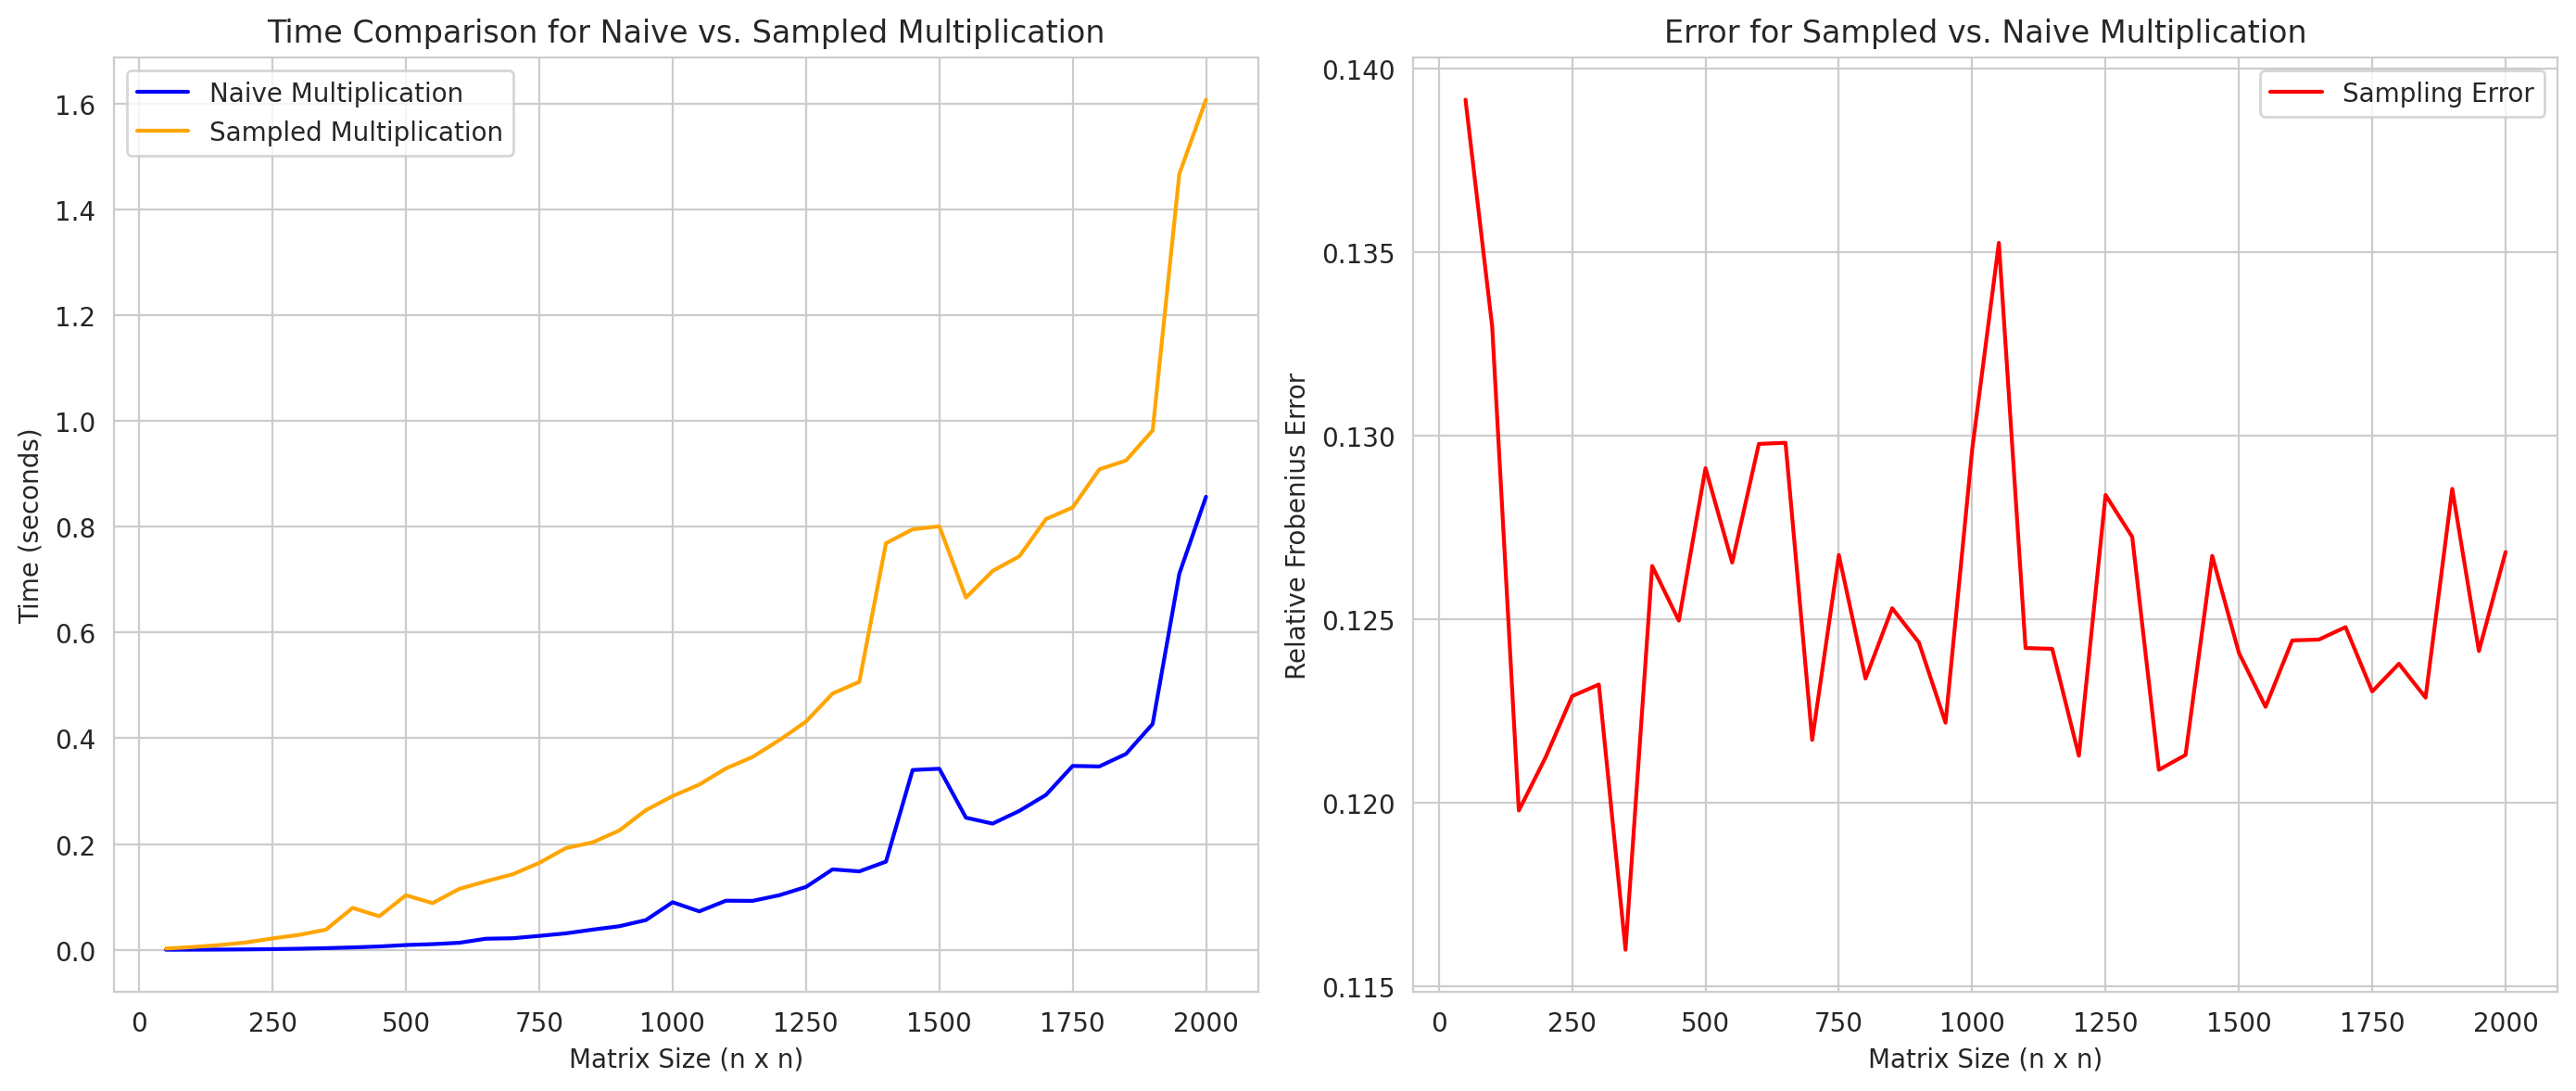

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')

def naive_matrix_multiply(A, B):
    return A @ B

def matrix_multiply_sampled(A, B, num_samples):
    n, d = A.shape
    d, m = B.shape

    col_norms = np.sum(A**2, axis=0)
    total_norm = np.sum(col_norms)
    probabilities = col_norms / total_norm

    C = np.zeros((n, m))
    for _ in range(num_samples):
        i = np.random.choice(d, p=probabilities)
        scale = A[:, i].reshape(-1, 1) @ B[i, :].reshape(1, -1)
        C += scale / probabilities[i]
    return C / num_samples

# Benchmarking function
def benchmark_sampling_vs_naive(max_size, step_size, num_samples):
    sizes = []
    naive_times = []
    sampled_times = []
    errors = []

    for n in range(step_size, max_size + 1, step_size):
        sizes.append(n)

        # Generate random matrices
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)

        # Time naive multiplication
        start = time.time()
        C_naive = naive_matrix_multiply(A, B)
        naive_time = time.time() - start
        naive_times.append(naive_time)

        # Time sampling-based multiplication
        start = time.time()
        C_sampled = matrix_multiply_sampled(A, B, num_samples)
        sampled_time = time.time() - start
        sampled_times.append(sampled_time)

        # Calculate error (Frobenius norm of the difference)
        error = np.linalg.norm(C_naive - C_sampled, 'fro') / np.linalg.norm(C_naive, 'fro')
        errors.append(error)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.plot(sizes, naive_times, label="Naive Multiplication", color="blue")
    ax1.plot(sizes, sampled_times, label="Sampled Multiplication", color="orange")
    ax1.set_xlabel("Matrix Size (n x n)")
    ax1.set_ylabel("Time (seconds)")
    ax1.set_title("Time Comparison for Naive vs. Sampled Multiplication")
    ax1.legend()

    ax2.plot(sizes, errors, label="Sampling Error", color="red")
    ax2.set_xlabel("Matrix Size (n x n)")
    ax2.set_ylabel("Relative Frobenius Error")
    ax2.set_title("Error for Sampled vs. Naive Multiplication")
    ax2.legend()

    plt.tight_layout()
    plt.show()

benchmark_sampling_vs_naive(max_size=2000, step_size=50, num_samples=50)